### 7CCSMCMP (Computer Programming)
# Coursework 2  2017
# DUE ON KEATs BY Tuesday 12th December 23:59

This is the second programming assigment for this module.  

- It is worth 8% of your final grade.  
- Do your work for this assignment in the cells of this jupyter notebook.  You should be able to fit the code required for this assignment in this notebook.
- This notebook comes with a ```data/``` directory that holds the assignment data for this exercise.
- You must do ***your own work***, ***collaboration*** is NOT allowed.
- Make sure that you properly ```comment``` your code, so that the grader can understand what your program is doing.  ***Uncommented code will result in loss of marks!***

## Your Details
Edit this Markdown cell with:

- *Luke Whittaker*
- *1763234*

## Part 1 [25 points in total]

In this exercise, you will be exploring flight delay data in the United States as provided by [US Department of Transportation](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time).  

In the data/ directory you will find the .csv file for September 2015 (```ontime_flights_sept2015.csv```). 

Name | Description
--- | ---
YEAR | 2015
MONTH | 9
DAY_OF_MONTH | 1-30
DAY_OF_WEEK	| 1 (Monday) - 7 (Sunday)
UNIQUE_CARRIER | unique carrier code (see carriers.csv for look-up table)
TAIL_NUM | plane tail number
FL_NUM | flight number
ORIGIN |origin IATA airport code (see airports.csv for look-up table)
DEST | destination IATA airport code
CRS_DEP_TIME | scheduled departure time (local, hhmm)
DEP_TIME | actual departure time (local, hhmm)
CRS_ARR_TIME | scheduled arrival time (local, hhmm)
ARR_TIME | actual arrival time (local, hhmm)
ARR_DELAY | arrival delay, in minutes
CANCELLED | was the flight cancelled?
CANCELLATION_CODE |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
DIVERTED | 1 = yes, 0 = no
CRS_ELAPSED_TIME | in minutes
ACTUAL_ELAPSED_TIME	| in minutes
AIR_TIME | in minutes
DISTANCE | in miles
CARRIER_DELAY | in minutes
WEATHER_DELAY | in minutes
NAS_DELAY | in minutes
SECURITY_DELAY | in minutes
LATE_AIRCRAFT_DELAY | in minutes

Answer each of the questions below, and include a short explanation for each answer or plot that you generate (use a Markdown cell to write your explanation).

To get you started, the dataset is loaded into a Pandas DataFrame, and the columns are listed for you. (*Note*: ignore the last columns "Unnamed: 26", this is due to a dangling comma on every line")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # I added
import pandas as pd
import numpy as np # I added

flights = pd.read_csv("data/ontime_flights_sept2015_full.csv")
flights.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'TAIL_NUM', u'FL_NUM', u'ORIGIN', u'DEST', u'CRS_DEP_TIME',
       u'DEP_TIME', u'CRS_ARR_TIME', u'ARR_TIME', u'ARR_DELAY', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'CARRIER_DELAY',
       u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'Unnamed: 26'],
      dtype='object')

**Question 1.1 [5 points]** How many flights where recorded in the month of September?

In [2]:
# Use the shape function as all flights recorded are in September.
flights.shape[0]

464946

Q1.1)

By using the shape function we are able to see how many flights take place in September, as we can see there are 464,946 flights.

**Question 1.2 [5 points]** In which direction do flights between JFK (New York City) and LAX (Los Angelos) take less time, JFK->LAX or LAX->JFK?  (Explain your calculations)

**Question 1.3 [5 points]** On average, what is the difference in minutes between the two directions?

In [3]:
# Q)1.2 First we want to find the find the time it takes to get from JFK -> LAX. Then we can focus
# on getting the flight time to go from LAX -> JFK.
flights.head(2) # For debugging purposes
jfk_to_lax = (flights["ORIGIN"] == "JFK").groupby(flights["DEST"] == "LAX") # Wrong

**Question 1.4 [5 points]** 

Plot the daily total weather delay for September.


**Question 1.5 [5 points]** 

Based on your plot, which day in Sept. had the most weather delay?

In [4]:
# This cell is for debugging purposes
day_of_month_list = []
first_sep = flights["WEATHER_DELAY"].groupby(flights["DAY_OF_MONTH"] == 1).sum()
second_sep = flights["WEATHER_DELAY"].groupby(flights["DAY_OF_MONTH"] == 2).sum()
third_sep = flights["WEATHER_DELAY"].groupby(flights["DAY_OF_MONTH"] == 3).sum()
day_of_month_list.append(int(first_sep[1])) # This adds the number weather dealys to the list
day_of_month_list.append(int(second_sep[1]))
day_of_month_list.append(int(third_sep[1]))
print len(day_of_month_list)
print day_of_month_list
print first_sep

In [5]:
# Use a loop to calculate the sum of weather delays for each day in September.

weather_delay_list = []  # Used to hold the total number of weather delays per day.
day_of_month_counter = 1  # Loop counter.

while day_of_month_counter <= 30:
    weath_delay = flights["WEATHER_DELAY"].groupby(flights["DAY_OF_MONTH"] == day_of_month_counter).sum()
    
    # We only want to add the values that returned True, so by indexing at 1 we obtain these values.
    weather_delay_list.append(int(weath_delay[1])) # Casts sum into an integer before appending the list.
    day_of_month_counter += 1
    
# print len(weather_delay_list) # Debugging purposes
# print weather_delay_list # Debugging purpose

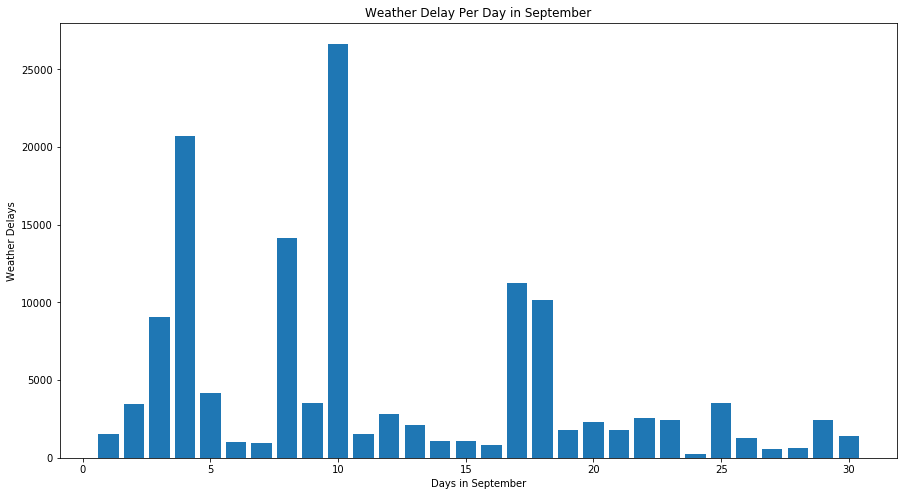

In [20]:
# Now that we have a list containing the total number of weather delays in september.
# We can now plot this against their corresponding day of the month.
days_of_september = np.arange(1,31)

plt.figure(figsize=(15,8))
plt.title("Weather Delay Per Day in September")
plt.xlabel("Days in September")
plt.ylabel("Weather Delays")
plt.bar(days_of_september, weather_delay_list)
plt.show()

Q1.4)

Before we can mention the above graph, slight discussion must be had regarding the implementation of obtaining the sum of all weather delays. In order to access the number of delays for 1st September. We would need to use the groupby funtion, such that we find the weather delay column and then groupby the day of the month. Once, we have access to all of the delays associated with 1st September we apply the sum function. Additionally, the while loop undertook the arduous task of writing each statement for calculating the sum.

Now, that I was able to access the weather dealy for 1st September and knowing that there are 30 days in September; I looked to use a while loop to find the sum of the daily weather delays to place in to a list ready to plot. At this point I have all of the data about the delays ready to be printed. However, I was unable to use the flights["DAY_OF_MONTH"] columns for my x-axis, this was due to their lengths being different. Moreover, I created a numpy array with the values 1-30 to resemble the days of the month to act as my flights["DAY_OF_MONTH"] column.

Q1.5)

Based on the above plot the day that experienced the most number of weather deays was 10th September with around 26,000 flight delays due to bad weather.

## Part 2 [25 points in total]

## The Data: Tweets collected over 48 hours Geolocated in the USA

In this coursework, you will be exploring this collection of tweets. In the ```data/``` directory you will find a ```tweets2.csv``` containing the tweets data. These tweets are all identified as being in english.

Here are descriptions of a few fields that will be useful for you:


Name | Description
--- | ---
Tweet Id | unique tweet id
Date | 
Hour | 
User Name | 
Nickname | the @name of the tweet
Bio |  
Tweet content |  The text of the tweet
Favs |  
RTs |  Number of retweets for the tweet
Latitude |  
Longitude |  
Country |  
Place (as appears on Bio) | 
Profile |  
picture |  
Followers |  
Following |  
favorited |  
Listed |  
Tweet language (ISO 639-1) |  
Tweet Url |  
 

Answer each of the questions below, and include a short explanation for each answer or plot that you generate (use a Markdown cell to write your explanation).

In [7]:
import geopandas as gpd
from shapely.geometry import Point

**Question 2.1 [10 points]** 

What percentage of the Tweets from this dataset fall within the 50 states (including Alaska, Hawaii, and DC) of the US? (Hint: use spatial join to combine tweets with States geo data).

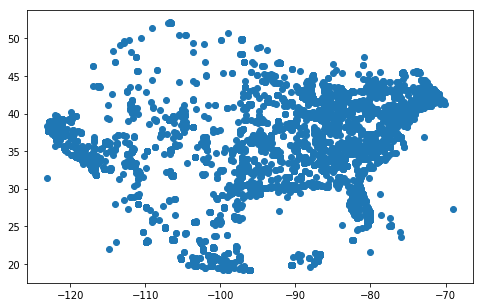

In [8]:
# Read in tweets-2.csv data.
twitter_data = pd.read_csv("data/tweets-2.csv")
twitter_data.head(2)

# Try and get the long, lat of the tweets
# We can use Python's zip function
long_lat_points = [Point(longLat) for longLat in zip(twitter_data.Longitude, twitter_data.Latitude)]
tweets = twitter_data.drop(["Longitude", "Latitude", "Country"], axis=1)
# long_lat_points # Debugging purposes

crs = {"init": "epsg:4326"}

# Now, can creat the GeoPandas dataframe
geo_df = gpd.GeoDataFrame(tweets, crs=crs, geometry=long_lat_points)

# geo_df # Debugging purposes
#geo_df[geo_df.StopType == "Tweet"].plot(color="red")

geo_df.plot(figsize=(8,8))

**Question 2.2 [10 points]** 

For those Tweets that are within the US boundaries, create a *cloropleth* map of the ***United States*** showing the number of Tweets per State (treat DC as a state in this case).  Include a legend showing the color scale for the number of Tweets. (For chloropleth maps, see http://geopandas.org/mapping.html#chloropleth-maps).

**Question 2.3 [5 points]** 

Find the top 3 states with the *highest density* of Tweets (from the dataset) per area.  

## Part 3 [NLP] [25 points in total]


This data contains the text of the tweet (in the 'tweet content' column of the tweets.csv provided). In this section we will be focusing on this column.

**Question 3.1 [10 points]** 

Load the 'Tweet content' column into NLTK. 

Make sure that when you read in the .csv you use the following syntax:


```all=pd.read_csv('tweets2.csv', encoding='iso-8859-1')```

This encoding will ensure that the text is read in clean of strange symbols.

Show your code and document it, ensuring that you have produced an NLTK.Text.text object. 

In [9]:
import nltk
tweet_data = pd.read_csv("data/tweets-2.csv", encoding='iso-8859-1')
# Print the top 2 items.
# tweet_data.head(2) # Debugging purposes.

# Now, let's convert the tweet text column into a long string.
# First, we will need to put each item in the column into a list.
tweets = tweet_data["Tweet content"]

# Then, we can convert the tweet content into a string using the to_string function
tweets = tweets.to_string(index=False)

# Next, we can tokenize the words and then convert the tweets variable into a nltk.Text object.
tweets = nltk.word_tokenize(tweets)
tweets = nltk.Text(tweets)
type(tweets)

nltk.text.Text

The code above looks to extract all of the data regarding twitter tweets and place them into a list.
Once this list has been made, I then converted the list into a string by utilising Python's join function.
When the tweets are in the string it is easier for us to use the word_tokenize function provided by nltk.
Finally, when we have tokenized all of the words, we then cast the tweets variable, which at this point is a string, into an nltk.Text object.

** Question 3.2 [5 points] **

Use the object in Question 3.1 to calculate the 50 most frequent words.

In [10]:
# Now, that we have our tweets as an nltk.Text object we can now look to see what the 50 most commons words are.
# First, we need to use the FreqDist function.
word_distribution = nltk.FreqDist(tweets)

# then print the 50 most common words
word_distribution.most_common(50)

[(u'...', 19151),
 (u'#', 14186),
 (u'@', 7626),
 (u':', 4790),
 (u',', 4444),
 (u'!', 3864),
 (u'in', 3179),
 (u'https', 2928),
 (u'at', 2594),
 (u'I', 2578),
 (u'.', 2331),
 (u'a', 2330),
 (u'to', 1828),
 (u'the', 1814),
 (u'(', 1636),
 (u"'m", 1489),
 (u'for', 1196),
 (u'-', 1166),
 (u'you', 1143),
 (u'and', 1011),
 (u'job', 942),
 (u"'s", 935),
 (u'of', 909),
 (u'_', 890),
 (u'?', 876),
 (u'on', 798),
 (u'this', 763),
 (u'The', 736),
 (u'our', 733),
 (u'my', 714),
 (u'We', 643),
 (u'is', 641),
 (u';', 635),
 (u')', 629),
 (u'&', 613),
 (u"'re", 613),
 (u'with', 609),
 (u'de', 545),
 (u'__', 511),
 (u'latest', 500),
 (u'Just', 473),
 (u'amp', 470),
 (u'Job', 432),
 (u'be', 404),
 (u'posted', 399),
 (u'hiring', 390),
 (u'Can', 382),
 (u'it', 379),
 (u'by', 375),
 (u'anyone', 369)]

First, I looked to use the FreqDist function given by NLTK; this would obtain the frequency distribution of the words contained within the tweet data.
After the distribution is known, I then used the most_common function with the parameter 50, which returns a list of the 50 most commonly used words in the weets.

** Question 3.3 [5 points]**

Plot a cumulative frequency distribution of the most frequent words.

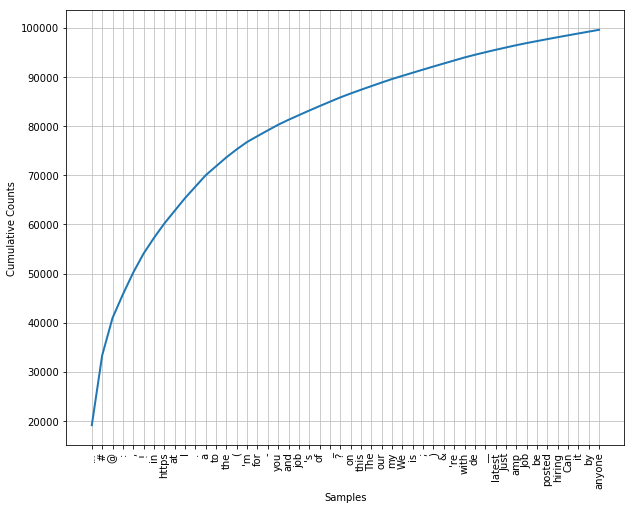

In [11]:
# In order to plot the cumulative distribution of the most common words. We will want to plot the variable.
# that conatins the frequency of the words, and provide the function with the cumulative parameter.
plt.figure(figsize=(10,8)) # Enlarges the graph.
word_distribution.plot(50, cumulative=True)

The above cumulative frequency graph looks to show the distribution of the words contained in the word_distribution. As we one can see, the distribution of the words lies within the counts of 30,000 to 160,000 utternances. It is worth noting that I was unable to view the graph in a larger size to fully test its validity.

** Question 3.4 [5 points] **

Find and print the collocations in the tweet content.

In [12]:
# Now we can use the collocations function to find the most frequent co-occured words.
tweets.collocations()

recommend anyone; ... ...; great fit; job might; New York; job open;
job near; //t ...; Foro Sol; Wind 0.0; 0.0 mph; Los Angeles; Job
alert; ... Want; http ...; Winn Dixie; htt ...; SONIC Drive-In; Health
Care; ebbtideapp Tide


The above code/output shows the words that most frequenctly co-occurr together. This tells us that if people include the word anyone within their tweet, they are more likely to accompany that word with recommend.

## Part 4 [Graphs] [25 point in total]

In this section we are going to focus on the connections between different hashtags, and treat them as a graph in order to visualise the relationships between hashtags that occur together.

** Question 4.1 [10 points]**

The file coachella_hashtags.csv contains a sample of the tweets that have the #coachella in them. This is a small sample of tweets with the #coachella and which have at least one more # in them. These hashtags have been extracted to separate columns: tag1, tag2, tag3.

Read this data in and using tag1 and tag2 load this data into a networkX Graph object and draw the graph. Use apropriate options and colors.

/Users/Luke/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Luke/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Luke/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Luke/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

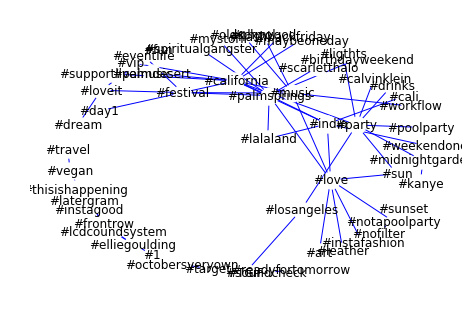

In [13]:
# Before we construct the graph we need to import the NetworkX module.
import networkx as nx

# Now that we have NetworkX imported, we can now load in the Coachell_hastags data.
# For this we will use pandas.
coachella_hashtag_data = pd.read_csv("data/coachella_hashtags.csv")
# print coachella_hashtag_data  # Debugging purposes.
# Now, let's take a look at the data.
# coachella_hashtag_data.head() # Debugging purposes.

# We have successfully imported the data, next let's look to visualise it.
# First, we will need to create a network from the pandas dataframe.
coachella_network = nx.from_pandas_dataframe(coachella_hashtag_data,
                                            "tag1",
                                            "tag2",
                                            create_using=nx.Graph())

# Finally, we can now draw the network.
# Hmm, for some reason I am not able to change the colour of the edges - will come back to this.
nx.draw_spring(coachella_network,
               node_color="white",
               edge_color='blue',
               with_labels=True)

**Please note that I have include graphs for both the basic draw algorithm and the draw_spring algorithm. 
My reason for this was that they both show a clearer representaion of the network than the other available options.**

The above graph shows the connections between each tag in the coacheclla dataset.
The network is set out using the draw_spring algorithm, with the edges coloured in blue.

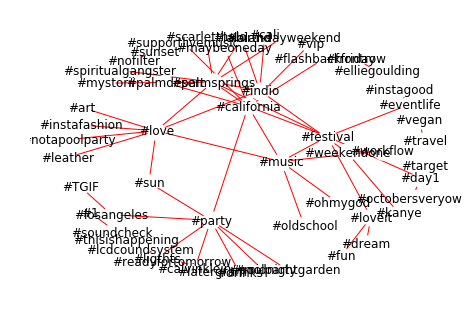

In [14]:
# Image using the draw algorithm.
nx.draw(coachella_network,
       node_color="white",
        edge_color='red',
       with_labels=True)

The above graph looks to represent the network using the basic draw algorithm. This alogrithm was chosen because it provides a clearer visualisation of the network compared to the draw_random, draw_circular, and draw_spectral algorithms.

** Question 4.2 [10 points] **

Using the graph created in 4.1 provide the following information about the graph:

- Numeber of nodes and number of edges
- The nodes connected to ```#lcdcoundsystem```
- The node with the highest clustering measure
- The node with the highes closeness centrality measure
- Find the ***cliques*** of the network

In [15]:
# Number of nodes.
# This is wrong, for some reason the last ten items are not being loaded in.
print "There are {0} number of nodes in the coachella network.".format(nx.number_of_nodes(coachella_network))
# Number of edges
print "\nThere are {0} number of edges in the coachella network.".format(nx.number_of_edges(coachella_network))

# Nodes connected to #lcdcoundsystem.
print "\nThe nodes connected to #lcdcoundsystem are:\n{0}".format(coachella_network.neighbors("#lcdcoundsystem"))

# Node with the highest cluster measures.
print "\nNode(s) with the highest cluster measure:"
cluster_measure = nx.clustering(coachella_network)
print max(cluster_measure, key=cluster_measure.get)

# Nodes with the highest closeness centrality measure.
print "\nNode(s) with the highest closeness centrality measure:"
centrality_measure = nx.closeness_centrality(coachella_network)
# Finds the maximum value from the dictionary.
centrality_measure = max(centrality_measure, key=centrality_measure.get)
print centrality_measure

# Cliques of the network.
print "\nThe cliques of the network are:"
list(nx.find_cliques(coachella_network))

There are 55 number of nodes in the coachella network.

There are 55 number of edges in the coachella network.

The nodes connected to #lcdcoundsystem are:
['#latergram', '#1', '#thisishappening']

Node(s) with the highest cluster measure:
#lalaland

Node(s) with the highest closeness centrality measure:
#california

The cliques of the network are:


[['#nofilter', '#sunset'],
 ['#poolparty', '#party'],
 ['#vegan', '#travel'],
 ['#vegan', '#instagood'],
 ['#art', '#love'],
 ['#1', '#lcdcoundsystem'],
 ['#kanye', '#weekendone'],
 ['#thisishappening', '#lcdcoundsystem'],
 ['#cali', '#indio'],
 ['#readyfortomorrow', '#soundcheck'],
 ['#calvinklein', '#party'],
 ['#lcdcoundsystem', '#latergram'],
 ['#loveit', '#fun'],
 ['#loveit', '#festival'],
 ['#loveit', '#dream'],
 ['#birthdayweekend', '#palmsprings'],
 ['#california', '#maybeoneday'],
 ['#california', '#music', '#festival'],
 ['#california', '#palmsprings', '#indio'],
 ['#california', '#palmsprings', '#festival'],
 ['#california', '#vip'],
 ['#california', '#flashbackfriday'],
 ['#california', '#party'],
 ['#california', '#palmdesert'],
 ['#california', '#supportlivemusic'],
 ['#scarletthalo', '#palmsprings'],
 ['#drinks', '#party'],
 ['#instafashion', '#love'],
 ['#eventlife', '#festival'],
 ['#TGIF', '#losangeles'],
 ['#target', '#octobersveryown'],
 ['#midnightgarden', '#party'

For Q)4.2 we can see that there are 55 nodes and edges within the network. 
Also, when people use the hashtag #lcdcoundsystem they are more likely to use the hashtags: #latergram, #1, and #thisishappening.

Moreover, the hashtag lalaland has the highest cluster measure; and california has the highest closeness centrality measure.

We look to find the cliques of the network, by utilising the find_cliques function available with NetworkX.

** Question 4.3 [5 points]**

Some of the tag1 and tag2 combinations occur more than once in this sample of data. 

Load the data into a MultiGraph object and provide the following information about the MultiGraph:
- Number of nodes
- Number of edges

In [16]:
# Load the data into a multi-graph.
# Had to re-read the data in as I was getting a lot of errors when I tried to change.
# the above graph into a MultiGraph().
coachella_multGraph_data = pd.read_csv("data/coachella_hashtags.csv")
coachella_mult_net = nx.from_pandas_dataframe(coachella_multGraph_data,
                                            "tag1",
                                            "tag2",
                                            create_using=nx.MultiGraph())



# Number of nodes.
print "There are {0} number of nodes in the coachella_mult_net.".format(nx.number_of_nodes(coachella_mult_net))

# Number of edges.
print "There are {0} number of edges in the coachella_mult_net.".format(nx.number_of_edges(coachella_mult_net))

There are 55 number of nodes in the coachella_mult_net.
There are 62 number of edges in the coachella_mult_net.


As we can see from the above information, when we convert the coachella data from a graph to a multi graph we obtain the same number of nodes. This is not surprising as there are still the same number of hashtags within the data.

However, when we convert the data into a MultiGraph we can see that there are more edges, this shows that some of the hashtags have more than one association with other tags.